## 6. Decision Trees and Ensemble Learning
This week, we'll talk about decision trees and tree-based ensemble algorithms

### 6.1 Credit risk scoring project
Dataset https://github.com/gastonstat/CreditScoring

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

### 6.2 Data cleaning and preparation
Downloading the dataset
Re-encoding the categorical variables
Doing the train/validation/test split

In [2]:
import os

filename = "credit-scoring.csv"
url = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

if not os.path.isfile(filename):
    !wget $url -O $filename
else:
    print("Data file already downloaded")

Data file already downloaded


In [3]:
df = pd.read_csv(filename)

In [107]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
#Convert columns names to lower case to standardize naming
df.columns = df.columns.str.lower()

In [109]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


There are several categorical variables like status, home, marital, job, which are currently encoded as numbers. From the reference R code [here](https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R), we can see how to interpret these numerical values as the actual categorical values for the said features.

In [7]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

For status. e.g., the values are 1(good), 2(bad) as per the reference link. Howevere there is also a 0 value, which we will treat as unknown

Let us map the values to their actual categorical values as per the reference R code

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [9]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


We can see that income, assets, debt have 99999999 which according to the reference R code were encoded to represent the missing values in the original dataset. Let us remap them to NaNs and later we will decide how we handle the NaNs

In [6]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999,value=np.nan)

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In status we had an unknown record, let us drop that record and reset index of the dataframe

In [13]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [7]:
df = df[df.status != 'unk'].reset_index(drop = True)

In [15]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.000000,4454.000000,4454.000000,4454.000000,4420.000000,4407.000000,4436.000000,4454.000000,4454.000000
mean,7.986753,46.438707,37.080377,55.573417,130.564253,5403.979351,343.025924,1038.918276,1462.780198
std,8.174306,14.655462,10.984598,19.515634,86.376808,11574.418141,1245.991541,474.545999,628.128120
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.250000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1691.500000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


Let us also encode status of default as 1 and status of ok as 0

In [8]:
df.status = (df.status == 'default').astype(int)

Let us now split the data into train, val and test

In [47]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=11)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=11)

In [48]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [19]:
df_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,0,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,0,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,0,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,0,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,0,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [49]:
y_train = df_train['status'].values
y_val = df_val['status'].values
y_test = df_test['status'].values

In [21]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [50]:
del df_train['status']
del df_val['status']
del df_test['status']

In [23]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


### 6.3 Decision trees
* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

We can create our own function to implement decision tree example. Considering records, job, assets for taking decision, we could construct our decision tree function like below

In [24]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [25]:
xi = df_train.iloc[0]
xi.to_dict()

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

Let us take the first record in df_train and use our decision tree function to see what it predicts

In [26]:
assess_risk(xi)

'ok'

In [27]:
y_train[0]

1

We created our own decision tree function with decisions we programmed into it. Let us now use decision tree algorithm from scikit-learn to learn the decisions from the data

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

We had some NaNs in income, assets and debt (where we had replaced 99999999 to NaNs). Let us now fill the NaNs with 0

In [29]:
pd.concat([df_train.isnull().sum(),df_val.isnull().sum(),df_test.isnull().sum()],axis=1).T

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,0,0,0,0,0,0,0,25,30,11,0,0
1,0,0,0,0,0,0,0,0,5,8,3,0,0
2,0,0,0,0,0,0,0,0,4,9,4,0,0


In [14]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

In [31]:
pd.concat([df_train.isnull().sum(),df_val.isnull().sum(),df_test.isnull().sum()],axis=1).T

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
dv = DictVectorizer(sparse=False)
dt = DecisionTreeClassifier()

In [16]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [ ]:
dt.fit(X_train,y_train)

In [17]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [34]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.6604132861882734

This is the auc score on the validation data set and this is not so good. Let ussee what is the auc score on our training data set itself

In [35]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

The auc on training data set is 1.0 meaning there is overfitting. This is because the default depth of the tree in the DecisionTreeClassifier algorithm is infinite (this is the max_depth hyper parameter). Thus the algorithm has memorized the training data and has not generalized well. Hence there is overfitting and we can see a good auc score on training data and bad score on validation data (due to lack of generalization)

Now let us limit the max_depth to 3 and see the auc score on training and validation data sets

In [36]:
max_depth = 3
dt = DecisionTreeClassifier(max_depth=max_depth)

dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print(f"train: {auc}")
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print(f"val: {auc}")

train: 0.7761016984958594
val: 0.7389079944782155


Thus we can see now that although the auc score on the training data set has reduced, the auc score on the validation data set has improved. Thus the model is now not overfitting by restricting the depth to level of 3

When we have a depth of 1 it is called as a decision stump - its not a tree just 1 split

In [37]:
max_depth = 1
dt = DecisionTreeClassifier(max_depth=max_depth)

dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print(f"train: {auc}")
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print(f"val: {auc}")

train: 0.6282660131823559
val: 0.6058644740984719


The auc score is not good since there is only one condition that the tree would have checked due to max_depth of 1. There is a useful function in sklearn to see what conditions were used by the tree in making the decisions.

In [38]:
from sklearn.tree import export_text

|--- feature_26 <= 0.50
|   |--- class: 0
|--- feature_26 >  0.50
|   |--- class: 1



In [ ]:
print(export_text(dt))

It says that if the feature_26 <= 0.5 then the prediction is that the client will default else the client will not default. Thus we can see the actual conditions the model is using to make the decisions.

If we want to see what the feature_26 was, we can do the following

In [39]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



Thus the condition records=yes, meaning if client has previous records (of defaulting) then prediction is that client will default (1) else will not default(0)

In [40]:
max_depth = 2
dt = DecisionTreeClassifier(max_depth=max_depth)

dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print(f"train: {auc}")
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print(f"val: {auc}")

print(export_text(dt, feature_names=dv.get_feature_names()))

train: 0.7054989859726213
val: 0.6685264343319367
|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



In [41]:
max_depth = 3
dt = DecisionTreeClassifier(max_depth=max_depth)

dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print(f"train: {auc}")
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print(f"val: {auc}")

print(export_text(dt, feature_names=dv.get_feature_names()))

train: 0.7761016984958594
val: 0.7389079944782155
|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



### 6.4 Decision tree learning algorithm
* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

We will try to understand how the decision tree algorithm comes up with the best conditions to use in making decisions. We will take a simple dataset for this

In [42]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [43]:
df_example.sort_values(by='assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


Thus, we could split the tree with condition if assets <= 0 else (i.e. assets > 0), or condition if assets <= 2000 else (i.e. assets > 2000) and so on. Let us consider all the conditions and see split using which condition gives best results

In [44]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]
from IPython.display import display
for T in Ts:
    df_left = df_example[df_example['assets'] <= T]
    df_right = df_example[df_example['assets'] > T]
    
    print(T)
    display(df_left)
    display(df_right)

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok


8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


To evaluate the different conditions to be used for split, we have different evaluation criteria like misclassification rate (e.g. when we predict defaults how many errors we are making i.e. how many incorrect predictions). This error is also called as impurity since it indicates how much the decision is impure. There are various ways to measure the impurity - misclassification, gini, entropy. 

We can take an average of the error/misclassification rate for our left and right splits of the tree to find the overall misclassification rate. Usually preferred method would be to use weighted average - but for simplicity we will take just the average

In [18]:
from IPython.display import display

In [45]:
#We can do the evaluation of left and right by just taking the value_counts of status field

Ts = [0, 2000, 3000, 4000, 5000, 8000]

for T in Ts:
    df_left = df_example[df_example['assets'] <= T]
    df_right = df_example[df_example['assets'] > T]
    
    print(T)
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


ok         0.5
default    0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


ok         0.5
default    0.5
Name: status, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


Thus, for the condition assets <=3000 we have the lowest impurity - 10% (average of misclassification in left and right splits)

In [46]:
#Attempting to get the misclassification rate calculated. however code still not working as required . wip ...

Ts = [0, 2000, 3000, 4000, 5000, 8000]
from IPython.display import display
for T in Ts:
    df_left = df_example[df_example['assets'] <= T]
    df_right = df_example[df_example['assets'] > T]
    
    print(T)
#     display(df_left)
#     print(df_left.status.value_counts(normalize=True))
    print(((df_left.status == 'default') > (df_left.status == 'ok')).value_counts(normalize=True))
#     display(df_right)
#     print(df_right.status.value_counts(normalize=True))
    print(((df_right.status == 'default') > (df_right.status == 'ok')).value_counts(normalize=True))

0
True    1.0
Name: status, dtype: float64
False    0.571429
True     0.428571
Name: status, dtype: float64
2000
True    1.0
Name: status, dtype: float64
False    0.666667
True     0.333333
Name: status, dtype: float64
3000
True    1.0
Name: status, dtype: float64
False    0.8
True     0.2
Name: status, dtype: float64
4000
True     0.75
False    0.25
Name: status, dtype: float64
False    0.75
True     0.25
Name: status, dtype: float64
5000
False    0.5
True     0.5
Name: status, dtype: float64
False    0.5
True     0.5
Name: status, dtype: float64
8000
True     0.571429
False    0.428571
Name: status, dtype: float64
False    1.0
Name: status, dtype: float64


Now lets us take data with 2 features for the decision tree

In [47]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [48]:
df_example.sort_values(by='debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


Thus for debt we can see that we can take the conditions as debt <= 500, 1000, 2000. Now combining the conditions for both assets and debt

In [49]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [50]:
for feature, Ts in thresholds.items():
    print('#'*20)
    print(feature)
    for T in Ts:
        df_left = df_example[df_example['assets'] <= T]
        df_right = df_example[df_example['assets'] > T]

        print(T)
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
    print('#'*20)

####################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64
5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


ok         0.5
default    0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


ok         0.5
default    0.5
Name: status, dtype: float64
8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64
####################
####################
debt
500


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
1000


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
####################


We can see that the misclassification rate is the lowest for assets <= 3000 condition amongst all conditions for assets and debt. Thus the best condition for this split would be assets <= 3000. This is how a decision tree determines the best threshold/condition to use for the split. Then it continues with the left and right to do the same again and again and again.

While this splitting of the tree can continue very long, it is best to come up with a stopping criteria so that we do not have overfitting. There can be several such criteria, some of which could be

1. When the group is already pure [will not make sense to split since both the decision for both left and right will be same as the group only has one type of records]
2. When group is too small [will not make sense to keep on splitting further - else we will have memorized the training data]
3. Tree reached depth limit [like we saw the max_depth parameter]

### 6.5 Decision trees parameter tuning
* selecting max_depth
* selecting min_samples_leaf

First let us see the auc score when using different values of max_depth parameters for the DecisionTree algorithm. Then we will see what is the best value for min_samples_leaf.

In [37]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,-1]
    auc = roc_auc_score(y_val,y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.745
  10 -> 0.706
  15 -> 0.661
  20 -> 0.651
None -> 0.666


We see that the max_depth parameter values 4, 5, 6 are the better ones. If this was the only parameter to fine tune, choosing 4 could make the tree simpler as it will have only 4 levels while still having a good enough auc score. Since we also have another parameter to consider - min_samples_leaf, we will check the auc score for different values of min_samples_leaf for the best values of max_depth (4, 5, 6)

In [38]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,-1]
        auc = roc_auc_score(y_val,y_pred)

        print('%4s, %d -> %.3f' % (d, s, auc))
        scores.append((d, s, auc))

   4, 1 -> 0.761
   4, 2 -> 0.761
   4, 5 -> 0.761
   4, 10 -> 0.761
   4, 15 -> 0.764
   4, 20 -> 0.761
   4, 100 -> 0.756
   4, 200 -> 0.747
   4, 500 -> 0.680
   5, 1 -> 0.766
   5, 2 -> 0.766
   5, 5 -> 0.768
   5, 10 -> 0.762
   5, 15 -> 0.772
   5, 20 -> 0.774
   5, 100 -> 0.763
   5, 200 -> 0.759
   5, 500 -> 0.680
   6, 1 -> 0.759
   6, 2 -> 0.762
   6, 5 -> 0.762
   6, 10 -> 0.778
   6, 15 -> 0.785
   6, 20 -> 0.773
   6, 100 -> 0.776
   6, 200 -> 0.768
   6, 500 -> 0.680


In [40]:
df_scores = pd.DataFrame(scores,columns = ['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc',ascending=False).head(10)

,max_depth,min_samples_leaf,auc
22,6,15,0.785471
21,6,10,0.777803
24,6,100,0.776434
14,5,20,0.773537
23,6,20,0.773337
13,5,15,0.772405
25,6,200,0.768267
11,5,5,0.767755
9,5,1,0.766496
10,5,2,0.766496


In [54]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.760
2                 0.761  0.766  0.759
5                 0.761  0.768  0.760
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

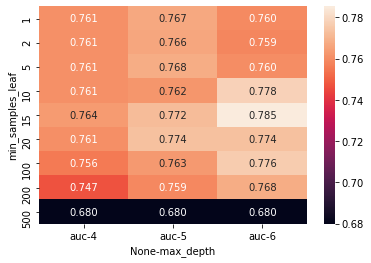

In [55]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

We can see that min_samples_leaf of 15 for max_depth of 6 gives the best auc. This way of determining best value of one parameter first then finding best value of another parameter may not give us the most appropriate results since we did not try all combinations of the 2 parameters. When the dataset is small it is possible to check all possible combinations, however for large datasets more practical approach would still be to choose one parameter then the other.

In [56]:
scores = []

for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,-1]
        auc = roc_auc_score(y_val,y_pred)

        scores.append((d, s, auc))

,max_depth,min_samples_leaf,auc
58,10.0,15,0.789098
76,20.0,15,0.788089
67,15.0,15,0.787832
85,NaN,15,0.786185
49,6.0,15,0.785695


auc                                                   \
max_depth           NaN   1.0    2.0    3.0    4.0    5.0    6.0    10.0   
min_samples_leaf                                                           
1                 0.655  0.606  0.669  0.739  0.761  0.767  0.745  0.691   
2                 0.706  0.606  0.669  0.739  0.761  0.767  0.754  0.719   
5                 0.714  0.606  0.669  0.739  0.761  0.768  0.761  0.724   
10                0.758  0.606  0.669  0.739  0.761  0.762  0.778  0.766   
15                0.786  0.606  0.669  0.738  0.764  0.772  0.786  0.789   
20                0.785  0.606  0.669  0.736  0.761  0.774  0.774  0.784   
100               0.779  0.606  0.669  0.736  0.756  0.763  0.776  0.779   
200               0.768  0.606  0.669  0.729  0.747  0.759  0.768  0.768   
500               0.680  0.620  0.680  0.680  0.680  0.680  0.680  0.680   

                                
max_depth          15.0   20.0  
min_samples_leaf                
1                 0.657  0.664  
2                 0.681  0.687  
5                 0.713  0.711  
10                0.760  0.762  
15                0.788  0.788  
20                0.782  0.783  
100               0.779  0.780  
200               0.768  0.768  
500               0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

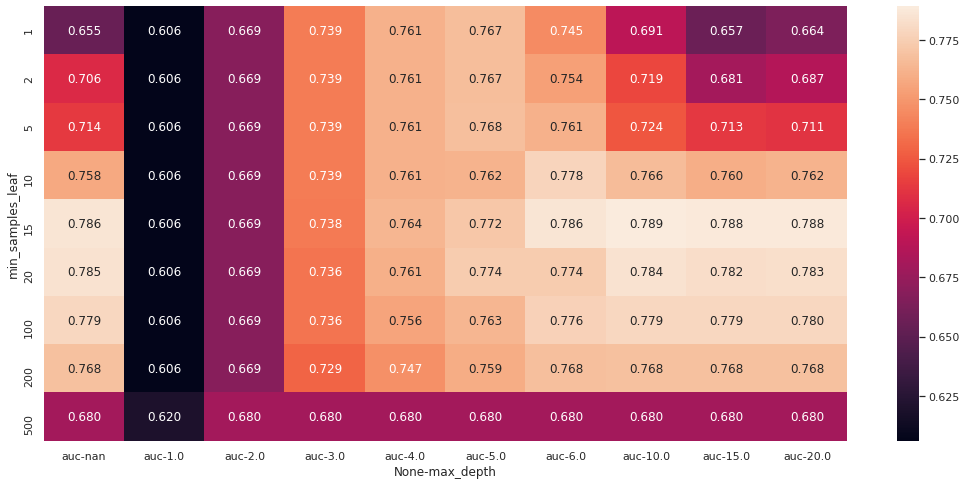

In [57]:
df_scores = pd.DataFrame(scores,columns = ['max_depth', 'min_samples_leaf', 'auc'])
display(df_scores.sort_values(by='auc',ascending=False).head())

df_scores_pivot = df_scores.pivot(index='min_samples_leaf',columns=['max_depth'], values=['auc'])
display(df_scores_pivot.round(3))

sns.set(rc={'figure.figsize':(18,8)})
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

Thus here the max_depth-min_samples_leaf combinations of None-15, 6-15, 10-15,10-20, 15-15, 20-15 are similar and good. Typically you would choose a smaller value of max_depth that still gives you a good enough result, to keep the model simpler.

### 6.6 Ensembles and random forest
* Board of experts
* Ensembling models
* Random forest - ensembling decision trees
* Tuning random forest

Rather than relying on decision from one expert, what if we have decisions from several experts? Well, we can see whats the most popular decision, whats the concensus and go with that.

This is what the Random Forest algorithm choses to use. Rather than using a single Decision Tree to arrive at a decision, we can benefit from using multiple decision trees and take majority of the votes (their decisions)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rt = RandomForestClassifier(n_estimators=10)
rt.fit(X_train,y_train)
y_pred = rt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7893487684967668

In [60]:
rt.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [61]:
for i in range(8):
    rt.fit(X_train,y_train)
    print(rt.predict_proba(X_val[[0]]))

[[0.8 0.2]]
[[0.9 0.1]]
[[1. 0.]]
[[1. 0.]]
[[0.9 0.1]]
[[0.9 0.1]]
[[0.8 0.2]]
[[0.8 0.2]]


We can see from above that if we repeat the process of training the model and using it to predict, we get different predictions everytime. This is because the RandomForest algorithm uses randomly selected set of features for every tree (and hence the name). However for reproducability it is better to fix the random_state (the random seed) to the algorithm

In [62]:
rt = RandomForestClassifier(n_estimators=10,random_state=1)
for i in range(8):
    rt.fit(X_train,y_train)
    print(rt.predict_proba(X_val[[0]]))

[[0.9 0.1]]
[[0.9 0.1]]
[[0.9 0.1]]
[[0.9 0.1]]
[[0.9 0.1]]
[[0.9 0.1]]
[[0.9 0.1]]
[[0.9 0.1]]


Now let us check the performance of the model for different values of n_estimators

In [82]:
scores = []

for n in range(10, 201, 10):
    rt = RandomForestClassifier(n_estimators=n,random_state=1)
    rt.fit(X_train,y_train)
    y_pred = rt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((n,auc))

In [85]:
df_scores = pd.DataFrame(scores,columns=['n_estimators','auc'])
df_scores.head()

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


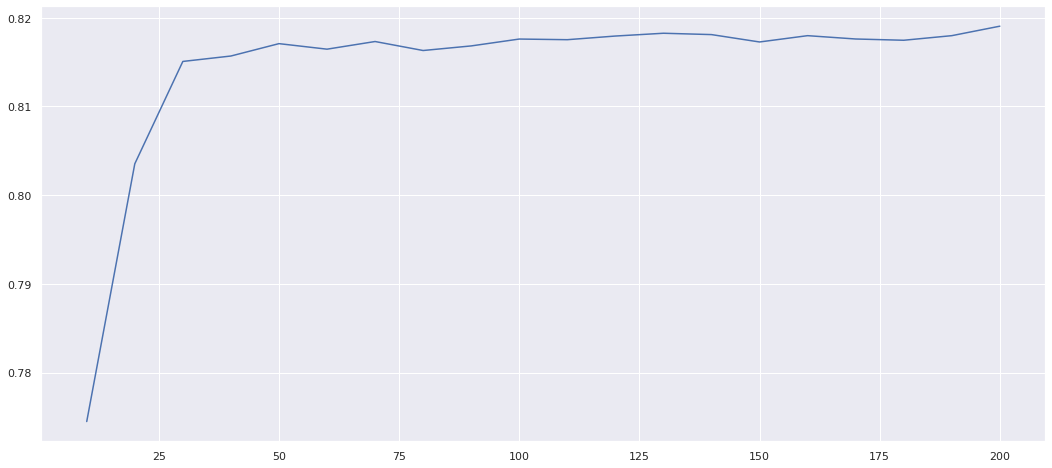

In [86]:
plt.plot(df_scores['n_estimators'],df_scores['auc'])

We can see that n_estimators i.e. number of trees upto 50 we get increasing auc score, but after that even if we keep increasing the number of trees, the score does not improve much.

In [87]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rt = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
        rt.fit(X_train,y_train)
        y_pred = rt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,n,auc))

In [88]:
columns = ['max_depth', 'n_estimators','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


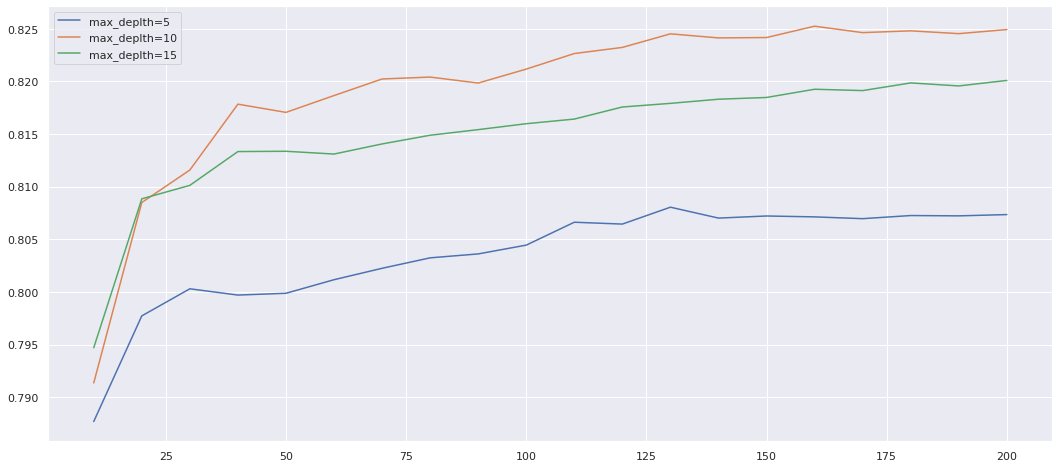

In [90]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores['max_depth'] == d]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label='max_deplth=%d' % d)
plt.legend()

Here we see that the auc score is the best for max_depth of 10 and then it decreases when we increase it to 15. So taking max_depth 10 we will further find what is the best value for min_samples_leaf

In [92]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rt = RandomForestClassifier(n_estimators=n,max_depth=10,min_samples_leaf=s,random_state=1)
        rt.fit(X_train,y_train)
        y_pred = rt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((s,n,auc))

In [93]:
columns = ['min_samples_leaf', 'n_estimators','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


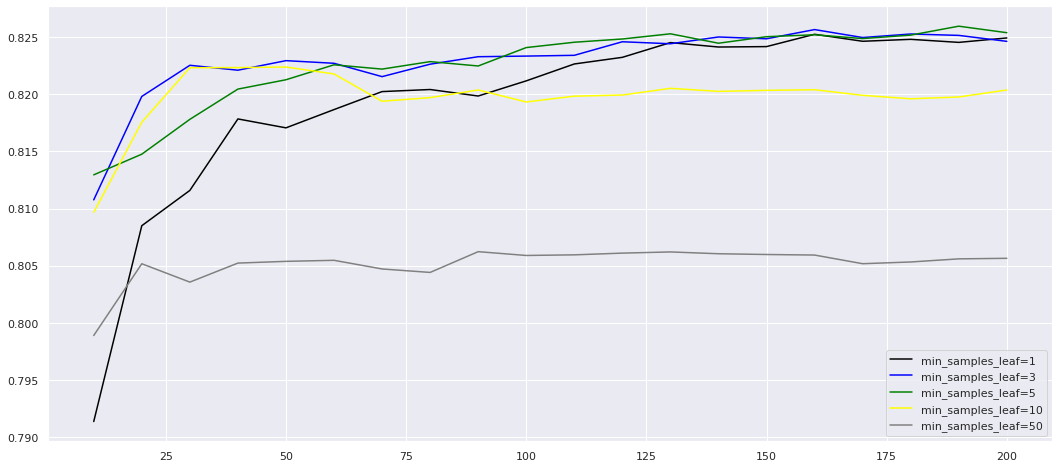

In [96]:
colors = ['black', 'blue', 'green', 'yellow', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
for color, s in zip(colors,min_samples_leaf_values):
    df_subset = df_scores[df_scores['min_samples_leaf'] == s]
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label='min_samples_leaf=%d' % s,color=color)
plt.legend()

We see that min_samples_leaf of 3 (blue color) seems to have better performance from earlier on (less number of trees) and that for this value the n_estimators of around 100 is where ther performance increases and then there is not much improvement. Thus we can now train our model with max_depth = 10, min_samples_leaf = 3, n_estimators = 100

In [33]:
min_samples_leaf = 3
max_depth = 10
n_estimators = 100

rt = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf,random_state=1)
rt.fit(X_train,y_train)
y_pred = rt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
auc

0.8233361991717324

Other important hyper parameters - max_features is used for selecting random features given to the decision trees. bootstrap - controls whether to select random subset of data or complete data. njobs - how many processes to run in parallel. Since Random forest can determine trees in parallel, it can significantly benefit from parallelism. Setting njobs to -1 will use all the processors on the machine

### 6.7 Gradient boosting and XGBoost
* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output

Gradient Boosting is another way of ensembling decision trees. Unlike Random Forest which trains multiple decision trees independently, Gradient boosting trains a decision tree, determines its error, then trains another tree to minimize the error made by previous tree, again determines error of the new tree and this continues.

In [63]:
!pip install xgboost

In [20]:
import xgboost as xgb

In [21]:
feature_names = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=feature_names)

In [22]:
dval = xgb.DMatrix(X_val,label=y_val,feature_names=feature_names)

In [24]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [75]:
#num_boost_round is number of trees to use for training, taking some random number
model = xgb.train(xgb_params,dtrain,num_boost_round=200)

[13:30:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8003166549611296

The score is quite good without much tuning of parameters. Let us see with different number of trees.

In [77]:
model = xgb.train(xgb_params,dtrain,num_boost_round=10)
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

[13:31:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8152745150274878

We need to control the number of trees. XGBoost is prone to overfitting

In XGBoost it is monitor the performance after each iteration of learning (after each tree is trained). We can evaluate performance of model on our validation data after each iteration. For this we will create a watchlist which comprises of our training and validation data as a tuple as below

In [23]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [26]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)
#evals=watchlist tells xgb to use the watchlist to evaluate the model after every iteration
#verbose_eval=5 tells xgb that instead of displaying output at every iteration, display it after the defined interval

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81788
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99991	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99999	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

We can see that after iteration 110 the evaluation score on training data is 1 meaning there is overfitting. Also, that the score on validation data starts to decrease around iteration 25 itself.

Let us see this on a plot. However the output above is not easy to be used to plot. In Jupyter notebook there is a way to capture whatever is printed to standard output. For this we can use the magic string %%capture

In [27]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [28]:
print(output.stdout)

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81788
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99991	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99999	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

In [24]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [30]:
df_score = parse_xgb_output(output)

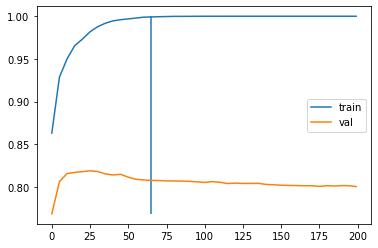

In [33]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.vlines(x=65,ymin=df_score.val_auc.min(),ymax=df_score.train_auc.max())
plt.legend()

We can see that for the training data post iterations 65 the score is almost constant (while it is overfitting), whereas for the validation data after around 25th iteration the score are decreasing. Looking only at the validation scores

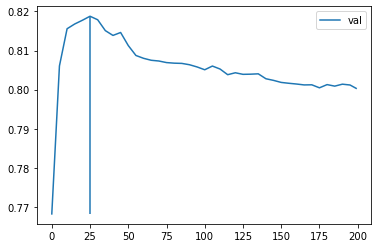

In [42]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.vlines(x=25,ymin=df_score.val_auc.min(),ymax=df_score.val_auc.max())
plt.legend()

### 6.8 XGBoost parameter tuning

Tuning the following parameters:
* eta
* max_depth
* min_child_weight

In [194]:
scores = {}

In [195]:
%%capture output

# for eta in [0.01, 0.05, 0.1, 0.3, 1.0]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [172]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

In [158]:
scores[key].head()

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.87341,0.77081
2,10,0.88191,0.78538
3,15,0.89110,0.79787
4,20,0.90161,0.80215


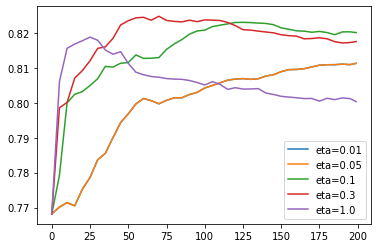

In [173]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

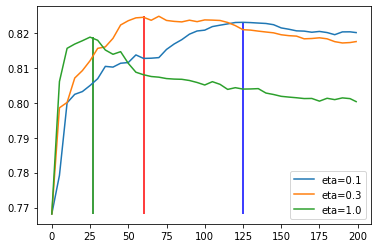

In [183]:
etas = [0.1, 0.3, 1.0]
for eta in etas:
    key = f'eta={eta}'
    df_score = scores[key]
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.vlines(x=27,ymin=scores['eta=1.0'].val_auc.min(),ymax=scores['eta=1.0'].val_auc.max(),color='g')
plt.vlines(x=60,ymin=scores['eta=0.3'].val_auc.min(),ymax=scores['eta=0.3'].val_auc.max(),color='r')
plt.vlines(x=125,ymin=scores['eta=0.1'].val_auc.min(),ymax=scores['eta=0.1'].val_auc.max(),color='b')
plt.legend()

From the plots above, we can see that model trained with eta of 1.0 learns fast but then it starts to overfit from arond 27th iteration, when trained with eta of 0.3 learns slower then starts overfitting around 60 onwards and when trained with eta of 0.1, trains even slower then starts overfitting from around 125 iterations

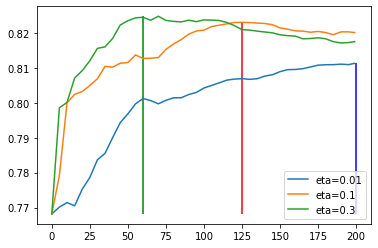

In [185]:
etas = [0.01, 0.1, 0.3]
for eta in etas:
    key = f'eta={eta}'
    df_score = scores[key]
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.vlines(x=60,ymin=scores['eta=0.3'].val_auc.min(),ymax=scores['eta=0.3'].val_auc.max(),color='g')
plt.vlines(x=125,ymin=scores['eta=0.1'].val_auc.min(),ymax=scores['eta=0.1'].val_auc.max(),color='r')
plt.vlines(x=200,ymin=scores['eta=0.01'].val_auc.min(),ymax=scores['eta=0.01'].val_auc.max(),color='b')
plt.legend()

From the plots above, we can see that model trained with eta 0.3 learns comparatively faster then starts overfitting around 60 onwards, when trained with eta of 0.1 learns even slower nd from 125 iteration onwards starts overfitting, when trained with eta of 0.01, trains pretty slow and beyond 200 iterations also it is still learning and getting better and may take a very long time to attain good score.

## NOT Getting same results as training videos, so leaving it at that for the moment. however in training videos the best performance was seen to be achieved at eta of 0.1

After having tuned the eta, we can now find the best max_depth and then min_child_weight

In [196]:
scores = {}

In [200]:
%%capture output

#using best eta=0.1
#for max_depth in [10, 6, 4, 3]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

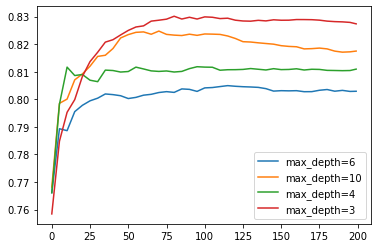

In [202]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

We can see that for max_depth of 10 it achieves good score early on but then starts degradingand is then stagnant. However for other values the scores keep increasing slower. Let us now ignore max_depth of 10 and focus on the score ranging from 0.8 to 0.84 to see whats happening with max_depths other than 10

In [208]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=10', 'max_depth=4', 'max_depth=3'])

max_depth=6
max_depth=4
max_depth=3


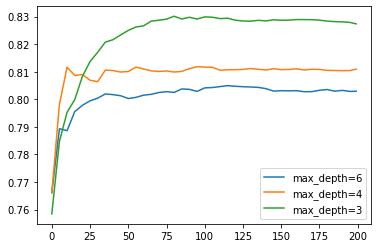

In [212]:
for max_depth, df_score in scores.items():
    
    if max_depth != 'max_depth=10':
        print(max_depth)
        plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
# plt.ylim(0.8, 0.84)
plt.legend()

Although getting graphs unlike the training video, still results are similar in terms of best max_depth. We can see that with max_depth of 4 and 6 the scores do not reach that high. However, with max_depth of 3 the score reaches the highest. So max_depth of 3 seems to give the best results

In [224]:
scores = {}

In [229]:
%%capture output

#using best eta=0.1
#using max_depth of 3
#for min_child_weight in [1, 10, 30]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

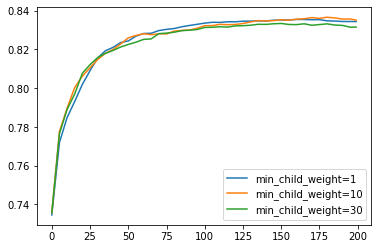

In [230]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()

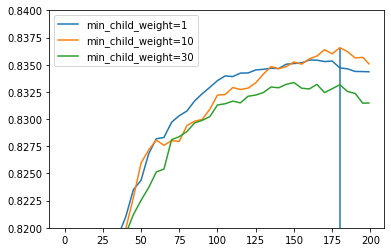

In [233]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82,0.84)
plt.vlines(x=180,ymin=scores['min_child_weight=10'].val_auc.min(),ymax=scores['min_child_weight=10'].val_auc.max())
plt.legend()

We can see that the min_child_weight of 10 gives slightly better results than other although difference is not much and the results are better around iterations = 180

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

subsample and colsample_bytree
lambda and alpha

### 6.9 Selecting the final model
* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

Now that we have trained using different algorithms and found the best parameters for each of these, let us compare the models and choose the best amongst them and use it to traing our final data

In [25]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [26]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7850802838390931

In [27]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [28]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [29]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [30]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [52]:
df_full_train = df_full_train.reset_index(drop=True)

In [58]:
y_full_train = (df_full_train.status == 1).astype(int).values

In [59]:
del df_full_train['status']

In [60]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [61]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [62]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [63]:
y_pred = model.predict(dtest)

In [64]:
roc_auc_score(y_test, y_pred)

0.8322662626460096

### 6.10 Summary
* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
* Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.

### 6.11 Explore more
* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check max_features and bootstrap.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in ExtraTreesClassifier. Try it for this project.
* XGBoost can deal with NAs - we don't have to do fillna for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: subsample and colsample_bytree.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for random forest (it's the same for plain decision trees) and for xgboost
* Trees can also be used for solving the regression problems: check DecisionTreeRegressor, RandomForestRegressor and the objective=reg:squarederror parameter for XGBoost.